<a href="https://colab.research.google.com/github/Pragna-Teja-Durishetti/BCStasks/blob/main/Mission_Synaptech_Save_Dr_Z%E2%80%99s_Mind.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install brian2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 25.3 MB/s eta 0:00:00


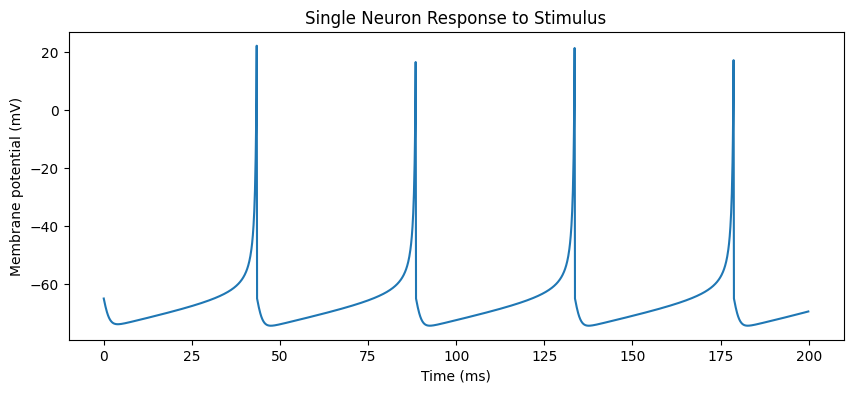

In [ ]:
from brian2 import *

# Izhikevich model example
start_scope()

# Simulation parameter
duration = 200*ms

# Neuron model equations
eqs = '''
dv/dt = (0.04*v**2 + 5*v + 140 - u + I)/ms : 1
du/dt = a*(b*v - u)/ms : 1
I : 1
a : 1
b : 1
c : 1
d : 1
'''

# Create neuron group
neurons = NeuronGroup(1, eqs,
                      threshold='v > 30',
                      reset='v = c; u += d',
                      method='euler')

# Assign parameters (example for regular spiking neuron)
neurons.v = -65
neurons.u = neurons.b * neurons.v
neurons.a = 0.02
neurons.b = 0.2
neurons.c = -65
neurons.d = 8
neurons.I = 10  # input current

# Record data
monitor = StateMonitor(neurons, 'v', record=True)

# Run simulation
run(duration)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(monitor.t/ms, monitor.v[0])
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV)')
plt.title('Single Neuron Response to Stimulus')
plt.show()

In [ ]:

start_scope()

# Parameters
N = 100  # number of neurons
tau = 10*ms
v_rest = -70*mV
v_threshold = -50*mV
v_reset = -65*mV

# Simple leaky integrate-and-fire neuron model
eqs = '''
dv/dt = (v_rest - v)/tau : volt
'''

# Define neuron group G
G = NeuronGroup(N, eqs, threshold='v>v_threshold', reset='v=v_reset', method='exact')
G.v = 'v_rest + rand() * (v_threshold - v_rest)'



In [ ]:

# Define STDP synapses
stdp = Synapses(G, G,
    '''
    w : 1
    dApre/dt = -Apre / taupre : 1 (event-driven)
    dApost/dt = -Apost / taupost : 1 (event-driven)
    taupre : second
    taupost : second
    dApre : 1
    dApost : 1
    ''',
    on_pre='''
    v_post += w * mV
    Apre += dApre
    w = clip(w + Apost, 0, 10)
    ''',
    on_post='''
    Apost += dApost
    w = clip(w + Apre, 0, 10)
    '''
)

stdp.connect(condition='i != j', p=0.1)
stdp.w = 'rand()'

# Set parameters
stdp.taupre = 20*ms
stdp.taupost = 20*ms
stdp.dApre = 0.01
stdp.dApost = -0.0105

